In [8]:
library(dplyr)
library(tidyr)
library(stringr)
library(ggplot2)


In [4]:
setwd("/mnt/disks/ssd-scratch-100/PREK_MEG")
list.files()

[1] "all_subjects-fsaverage-freq_domain-stc_2Hz.csv"    
 [2] "all_subjects-fsaverage-freq_domain-stc_2Hz_snr.csv"
 [3] "all_subjects-fsaverage-freq_domain-stc.csv"        
 [4] "prek_1103_2Hz.csv"                                 
 [5] "prek_1110_2Hz.csv"                                 
 [6] "prek_1112_2Hz.csv"                                 
 [7] "prek_1113_2Hz.csv"                                 
 [8] "prek_1184_2Hz.csv"                                 
 [9] "prek_1208_2Hz.csv"                                 
[10] "prek_1210_2Hz.csv"                                 
[11] "prek_1241_2Hz.csv"                                 
[12] "prek_1262_2Hz.csv"                                 
[13] "prek_1271_2Hz.csv"                                 
[14] "prek_1293_2Hz.csv"                                 
[15] "prek_1302_2Hz.csv"                                 
[16] "prek_1372_2Hz.csv"                                 
[17] "prek_1382_2Hz.csv"                                 
[18] "prek_1391_2Hz.csv"                                 
[19] "prek_1401_2Hz.csv"                                 
[20] "prek_1443_2Hz.csv"                                 
[21] "prek_1460_2Hz.csv"                                 
[22] "prek_1490_2Hz.csv"                                 
[23] "prek_1505_2Hz.csv"                                 
[24] "prek_1673_2Hz.csv"                                 
[25] "prek_1676_2Hz.csv"                                 
[26] "prek_1691_2Hz.csv"                                 
[27] "prek_1706_2Hz.csv"                                 
[28] "prek_1714_2Hz.csv"                                 
[29] "prek_1715_2Hz.csv"                                 
[30] "prek_1750_2Hz.csv"                                 
[31] "prek_1751_2Hz.csv"                                 
[32] "prek_1756_2Hz.csv"                                 
[33] "prek_1762_2Hz.csv"                                 
[34] "prek_1768_2Hz.csv"                                 
[35] "prek_1790_2Hz.csv"                                 
[36] "prek_1798_2Hz.csv"                                 
[37] "prek_1812_2Hz.csv"                                 
[38] "prek_1818_2Hz.csv"                                 
[39] "prek_1868_2Hz.csv"                                 
[40] "prek_1869_2Hz.csv"                                 
[41] "prek_1878_2Hz.csv"                                 
[42] "prek_1887_2Hz.csv"                                 
[43] "prek_1901_2Hz.csv"                                 
[44] "prek_1916_2Hz.csv"                                 
[45] "prek_1921_2Hz.csv"                                 
[46] "prek_1936_2Hz.csv"                                 
[47] "prek_1939_2Hz.csv"                                 
[48] "prek_1940_2Hz.csv"                                 
[49] "prek_1951_2Hz.csv"                                 
[50] "prek_1964_2Hz.csv"                                 
[51] "prek_1966_2Hz.csv"                                 
[52] "prek_3year_atleast2.csv"                           
[53] "yeatman_NLR_tree.txt"

In [5]:
d = read.csv("all_subjects-fsaverage-freq_domain-stc.csv")
head(d)


,subject,freq,source,value,timepoint
1,prek_1103,0,LH_0,21.92055,pre
2,prek_1103,0,LH_1,57.11423,pre
3,prek_1103,0,LH_2,50.42891,pre
4,prek_1103,0,LH_3,125.1102,pre
5,prek_1103,0,LH_4,69.88212,pre
6,prek_1103,0,LH_5,13.16507,pre


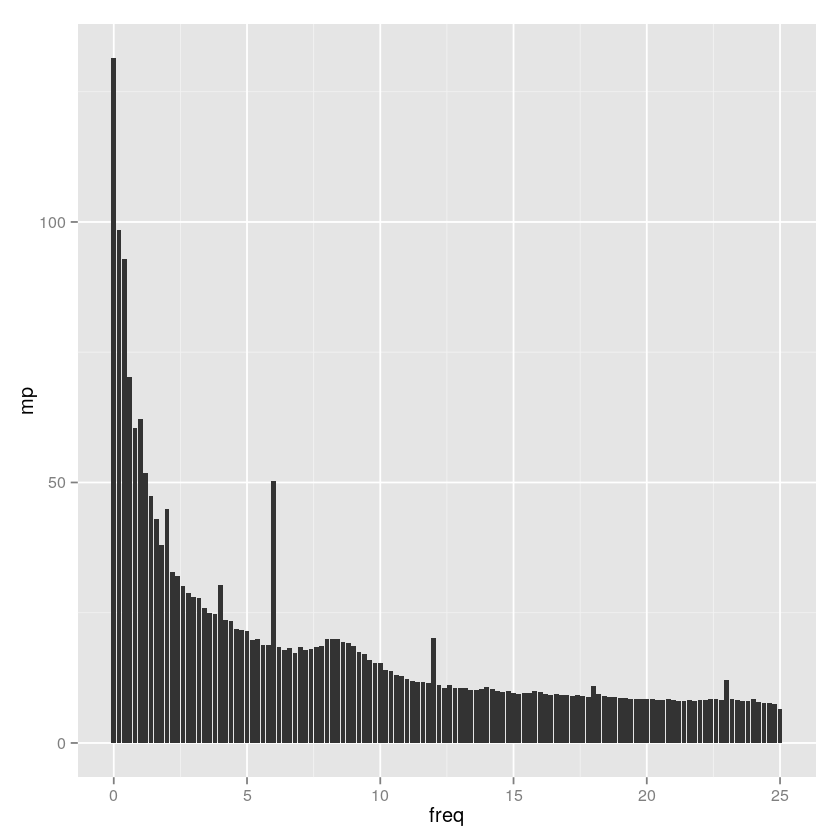

In [11]:
#md = summarize(group_by(d,freq), mp=mean(value))
ggplot(data=md, aes(x = freq, y = mp)) + geom_bar(stat = 'identity')

In [ ]:
# Remove all frequencies except those around 2Hz
d = filter(d, freq > 1.5)
d = filter(d, freq < 2.5)
write.csv(d,"all_subjects-fsaverage-freq_domain-stc_2Hz.csv")
subs = unique(d$subject)
for(ii in 1:length(subs)){
    write.csv(filter(d,subject==subs[ii]),paste(subs[ii],'_2Hz.csv', sep=''))
    print(paste('Writing: ',subs[ii],'_2Hz.csv', sep=''))
    
}

In [4]:
d = read.csv("all_subjects-fsaverage-freq_domain-stc_2Hz.csv",row.names=1)


In [47]:
sbin = 6 # Signal frequency
nbins = c(5,7) # noise bins. c(4,5,7,8) for 2 bins on either side of 2hz
subs = unique(d$subject)
for(ii in 1:length(subs)) {
    dsub = filter(d,subject == subs[ii])
    #dsub = read.csv(paste(subs[ii],'_2Hz.csv', sep=''))
    # sum(is.nan(dsub$freq))
    dsubw <- spread(dsub, freq, value)
    dsubw$snr <- dsubw[,sbin] / apply(dsubw[,nbins],1,mean)
    if (ii==1){
        dsnr <- dsubw
    } else {
        dsnr <- rbind(dsnr,dsubw)
    }
}
dsnr <- select(dsnr, subject, source,timepoint,snr)
dsnr$subID <- as.numeric(str_replace(dsnr$subject,'prek_',''))
write.csv(dsnr,"all_subjects-fsaverage-freq_domain-stc_2Hz_snr.csv")
unique(dsnr$subj)

[1] prek_1103 prek_1110 prek_1112 prek_1113 prek_1184 prek_1208 prek_1210
 [8] prek_1241 prek_1262 prek_1271 prek_1293 prek_1302 prek_1372 prek_1382
[15] prek_1391 prek_1401 prek_1443 prek_1460 prek_1490 prek_1505 prek_1673
[22] prek_1676 prek_1691 prek_1706 prek_1714 prek_1715 prek_1750 prek_1751
[29] prek_1756 prek_1762 prek_1768 prek_1790 prek_1798 prek_1812 prek_1818
[36] prek_1868 prek_1869 prek_1878 prek_1887 prek_1901 prek_1916 prek_1921
[43] prek_1936 prek_1939 prek_1940 prek_1951 prek_1964 prek_1966
48 Levels: prek_1103 prek_1110 prek_1112 prek_1113 prek_1184 ... prek_1966

In [46]:
unique(dsnr$subj)
subs
ii
head(dsnr)

[1] 1103 1110 1112 1113 1184 1208 1210 1241 1262 1271 1293 1302 1372 1382 1391
[16] 1401 1443 1460 1490 1505 1673 1676 1691 1706 1714 1715 1750 1751 1756 1762
[31] 1768 1790 1798 1812 1818 1868 1869 1878 1887 1901 1916 1921 1936 1939 1940
[46] 1951 1964 1966

[1] prek_1103 prek_1110 prek_1112 prek_1113 prek_1184 prek_1208 prek_1210
 [8] prek_1241 prek_1262 prek_1271 prek_1293 prek_1302 prek_1372 prek_1382
[15] prek_1391 prek_1401 prek_1443 prek_1460 prek_1490 prek_1505 prek_1673
[22] prek_1676 prek_1691 prek_1706 prek_1714 prek_1715 prek_1750 prek_1751
[29] prek_1756 prek_1762 prek_1768 prek_1790 prek_1798 prek_1812 prek_1818
[36] prek_1868 prek_1869 prek_1878 prek_1887 prek_1901 prek_1916 prek_1921
[43] prek_1936 prek_1939 prek_1940 prek_1951 prek_1964 prek_1966
48 Levels: prek_1103 prek_1110 prek_1112 prek_1113 prek_1184 ... prek_1966

[1] 48

,subject,source,timepoint,snr,subj
1,prek_1103,LH_0,post,2.026266,1103
2,prek_1103,LH_0,pre,1.47284,1103
3,prek_1103,LH_1,post,0.4243584,1103
4,prek_1103,LH_1,pre,0.9739935,1103
5,prek_1103,LH_10,post,3.518058,1103
6,prek_1103,LH_10,pre,0.6060749,1103


In [6]:
head(d)
head(dsnr)
colnames(dsnr)
dsnr2 <- select(dsnr, subject, source,timepoint,snr)
head(dsnr2)


,subject,freq,source,value,timepoint
1,prek_1103,1.6,LH_0,35.74838,pre
2,prek_1103,1.6,LH_1,61.01647,pre
3,prek_1103,1.6,LH_2,13.45125,pre
4,prek_1103,1.6,LH_3,40.23143,pre
5,prek_1103,1.6,LH_4,46.51031,pre
6,prek_1103,1.6,LH_5,37.63077,pre


,subject,source,timepoint,snr
1,prek_1966,LH_0,post,0.7955204
2,prek_1966,LH_0,pre,0.5095829
3,prek_1966,LH_1,post,2.26822
4,prek_1966,LH_1,pre,1.048189
5,prek_1966,LH_10,post,1.116011
6,prek_1966,LH_10,pre,0.962351


[1] "subject"   "source"    "timepoint" "snr"

,subject,source,timepoint,snr
1,prek_1966,LH_0,post,0.7955204
2,prek_1966,LH_0,pre,0.5095829
3,prek_1966,LH_1,post,2.26822
4,prek_1966,LH_1,pre,1.048189
5,prek_1966,LH_10,post,1.116011
6,prek_1966,LH_10,pre,0.962351


In [16]:
for(ii in 1:length(subs)){
    dsub = filter(d,subject==subs[ii])
    dsubw = spread(dsub,freq,value)
    
}

,subject,freq,source,value,timepoint


In [20]:
library(stringr)
dsnr$subject <- as.numeric(str_replace(dsnr$subject[2:3],'prek_',''))
write.csv(dsnr,"all_subjects-fsaverage-freq_domain-stc_2Hz_snr.csv")

In [21]:
head(dsnr)

,subject,source,timepoint,snr
1,1966,LH_0,post,0.7955204
2,1966,LH_0,pre,0.5095829
3,1966,LH_1,post,2.26822
4,1966,LH_1,pre,1.048189
5,1966,LH_10,post,1.116011
6,1966,LH_10,pre,0.962351
